In [87]:
import numpy as np
import pandas as pd

In [195]:
class ScratchLinearRegression:
    def __init__(self, num_iter=1000, lr=0.5 , no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose


    
    def fit(self, X, y, X_val=None, y_val=None):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        if not self.no_bias:
            X = np.c_[np.ones(n_samples), X]
        
        # Fix: initialize correct weight size
        self.weight = np.random.rand(X.shape[1])
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

        for i in range(self.iter):
            y_hyp = self._linear_hypothesis(X)
            self.weight = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)
            
            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)
        
        if self.verbose:
            print("Final training loss:", self.loss[-1])
        return self


    
    def predict(self, X):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.weight)


    
    def _linear_hypothesis(self, X):
        return np.dot(X, self.weight.T)


    
    def _gradient_descent(self, X, y, y_hyp):
        n_samples = X.shape[0]
        return self.weight - (self.lr * np.dot((y_hyp - y), X) / n_samples)


    
    def _loss_function(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)


In [196]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape

(5, 2)

In [197]:
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [198]:
slr = ScratchLinearRegression(100, 0.01, False, True)

In [199]:
weight = slr.fit(X, y)

Final training loss: 0.07990201690282886


In [200]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.48272271, 10.30480838, 16.12689404, 21.9489797 , 27.77106536])

In [201]:
MSE(y, slr_predict)

0.041006095200897055

# Problem 6: Verification

In [25]:
df = pd.read_csv('Data/house price data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [176]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [222]:
slr0 = ScratchLinearRegression(lr=0.01)
slr0.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr0Pred = slr0.predict(X_test_scaled)

result_reg = pd.DataFrame([slr0Pred, y_test], index=['Prediction', 'Actual value'])
result_reg

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Prediction,165851.089786,150846.479039,218903.106353,152989.99486,116764.577487,139700.196771,193716.795457,205506.132472,137235.153577,177426.075219,...,124909.937607,178069.129965,114728.237457,149881.89692,211400.80098,124588.410233,139914.548353,168530.484562,160706.651816,122444.894413
Actual value,202500.000000,121600.000000,235000.000000,116000.00000,144000.000000,160000.000000,213000.000000,219500.000000,110500.000000,157500.000000,...,119000.000000,265900.000000,135000.000000,185000.00000,230000.00000,149900.000000,118000.000000,162000.000000,147000.000000,119900.000000


In [223]:
MSE(y_test, slr0Pred)

3158997163.1936707

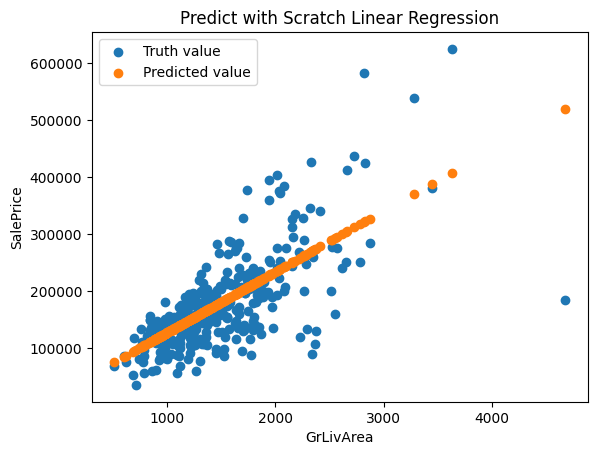

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with Scratch Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr0Pred, label='Predicted value')
plt.legend()
plt.show()
     

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([lr_predict, y_test], index=['Predicted value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predicted value,173524.726681,206775.016173,245275.351375,148406.860934,157671.64748,214598.613701,212848.598465,199363.186937,256598.979376,275643.262831,...,240848.842248,134509.681116,132347.897588,202142.622901,171980.59559,126994.909806,133994.970752,187627.790645,191333.705264,170642.348645
Truth value,155835.000000,170000.000000,313000.000000,178000.000000,158000.00000,136900.000000,192140.000000,228000.000000,235000.000000,402000.000000,...,205000.000000,91000.000000,142000.000000,126000.000000,148500.00000,149000.000000,145000.000000,178000.000000,284000.000000,227680.000000


In [189]:
MSE(y_test, lr_predict)

9966716519.75694

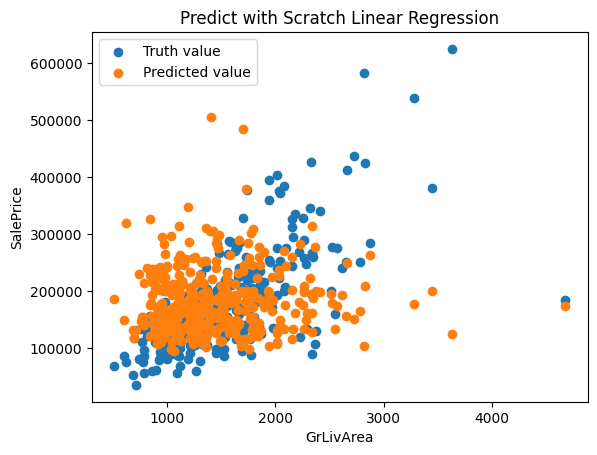

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with Scratch Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, lr_predict, label='Predicted value')
plt.legend()
plt.show()
     

# Problem 7: Learning Curve

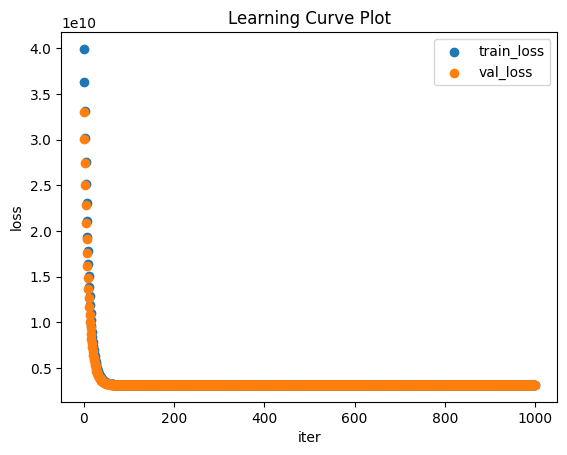

In [191]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr0.iter), slr0.loss, label='train_loss')
plt.scatter(range(slr0.iter), slr0.val_loss, label='val_loss')
plt.legend()
plt.show()